In [71]:
# Funzies meme evolution project for an hour of data
# 9/21/16

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import operator
import numpy as np
import seaborn as sns

%matplotlib inline

## Data Import

In [3]:
# data import
data_file = './logs/sodapoppin/2016-09-19-06PM/emotes.log'
data = []
with open(data_file, 'r') as f:
    for line in f:
        data.append(line)

data_stripped = []
for line in data:
    data_stripped.append( line.rstrip())
    
emotes = []
for pair in data_stripped:
    emotes.append( pair.split(' : ')[-1] )
    
counted = Counter(emotes)

sorted_emotes = sorted(counted.items(), key=operator.itemgetter(1))
sorted_emotes.reverse()


## Meme dominance over entire hour

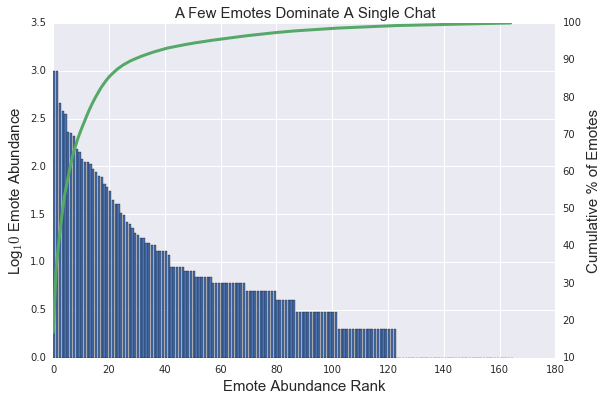

In [39]:
# Figure 1, meme dominance over entire period
palette = sns.color_palette()

meme_freq = [x[1] for x in sorted_emotes]
log_meme = np.log10(meme_freq)
cum_freq = np.cumsum(meme_freq)/float(sum(meme_freq))*100
ind = range(len(meme_freq))
f,ax = plt.subplots()
ax.bar(ind, log_meme)
ax2 = ax.twinx()
ax2.plot(ind, cum_freq, color=palette[1], lw=3)

ax.set_xlabel('Emote Abundance Rank', fontsize=15)
ax.set_ylabel(r'Log$_10$ Emote Abundance', fontsize=15)
ax2.set_ylabel('Cumulative % of Emotes', fontsize=15)
ax.set_title('A Few Emotes Dominate A Single Chat', fontsize=15)
ax2.grid('off')

f.show()

## time variance of memes

In [135]:

bins = []
bins.append(dict())
current_bin = bins[0]
time_period = 120
binmax = time_period

for line in data_stripped:
    pieces = line.split(' ') # split into [time, stuff, emote]
    if int(pieces[0]) > binmax: # for times not in current bin make a new bin.
        bins.append(dict())
        current_bin = bins[-1]
        binmax = binmax + time_period
    else:
        if pieces[-1] in current_bin.keys(): # existing emotes add 1
            current_bin[pieces[-1]] +=1
        else: # new emotes create key with frequency = 1
            current_bin[pieces[-1]] = 1


In [136]:
# Convert my list into a pandas dataframe:
df = pd.DataFrame(index=[0], data = bins[0])

# Add each minute by minute data
for i in bins[1:]:
    df = df.append(i, ignore_index=True)
    
# Fill missing
df = df.fillna(value=0)

# Normalize in each row
df_normed = df.div(df.sum(axis=1), axis=0)

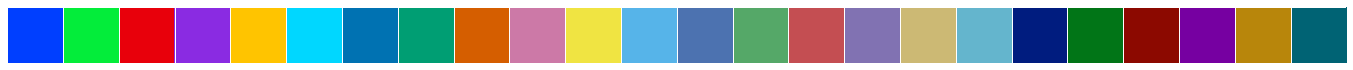

In [119]:
# Attempt to make a colorbar
p3 = sns.color_palette('bright')#, muted, bright, pastel, dark, colorblind
p4 = sns.color_palette('pastel')#, muted, bright, pastel, dark, colorblind
p5 = sns.color_palette()#, muted, bright, pastel, dark, colorblind
p7 = sns.color_palette('colorblind')#, muted, bright, pastel, dark, colorblind
pal =  p3 + p7 + p5 +p6
sns.palplot(pal)

len(pal)
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(pal)

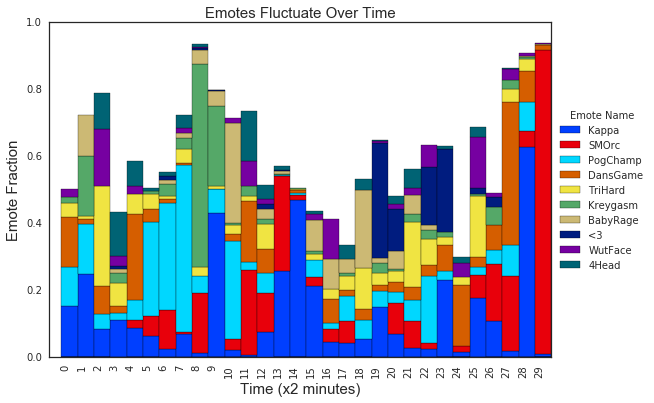

In [155]:
sums = df_normed.sum()
sums_sorted = sums.sort_values(ascending=False)

sns.set_style('white')
sns.despine()
top_emotes = df_normed[sums_sorted[:10].index]
#top_emotes['other'] = 1 - top_emotes.sum(axis=1)

f,ax = plt.subplots()
top_emotes.plot.bar(colormap = my_cmap, ax=plt.gca(), stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Emote Name')

for container in ax.containers:
    plt.setp(container, width=1)

x0, x1 = ax.get_xlim()
ax.set_xlim(x0 -0.5, x1 + 0.25)
ax.set_ylabel('Emote Fraction', fontsize=15)
ax.set_xlabel('Time (x2 minutes)', fontsize=15) # Convert to minutes by multiplying labels by 2
ax.set_title('Emotes Fluctuate Over Time', fontsize=15)

In [138]:
# Quantifying emote inequality/dominance

def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

# Inequality/dominance
gini(meme_freq)

for i in df.iterrows():
    values =  i[1].values
    gini(values)
    #non_zero = [x for x in values if x !=0]
    #print gini(values)

### Sentiment analysis of chat at various points combined with emote frequency?

I'd like to do some word frequency analysis/correlation of certain words with emotes to try to back out definitions for twitch emotes. To do this, we can try to do some sort of language processing on the text in small (2-5 minute chunks?) along with the emote frequency analysis. Then we can look at correlations between words and emotes and put it into either a bipartite network or just correlation bar plots for emote:group of words. The tricky part is how do we consider all the words in a 5 minute period? Can we strip out unnecessary words/emotes from the messages list?

Probably going to use NLTK to do this.

I need to figure out what's actually possible using nltk, right now I have no idea. Also need to get in terms of specific questions to ask.

One really basic question would be which emotes are associated with positive vs. negative meanings?
Harder (probably) Which words are correlated with each emote? Can we get an understanding of emote meaning from this context?
Whats the linguistic complexity of twitchchat vs classic literature?
Do different games/streamers/(streamer gender)/time of day/day of week have significantly different word frequencies/positivity scores, etc?


In [158]:
# Looking at words:
word_file = './logs/sodapoppin/2016-09-19-06PM/words.log'
word_data = []
with open(word_file, 'r') as f:
    for line in f:
        word_data.append(line)

In [161]:
import nltk
nltk.download()

showing info http://www.nltk.org/nltk_data/


True

In [162]:
len(word_data)

1

In [166]:
len(set(word_data[0].split(' '))) / float(len(word_data[0].split(' ')))

0.14103017444601604

In [167]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [168]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [170]:
float(len(set(text3))) / len(text3)

0.06230453042623537

In [171]:
len(text3)

44764

In [173]:
# Getting female streamers
import requests
from bs4 import BeautifulSoup

In [184]:
site = requests.get('http://topstreamers.com/ladies?search=&lang=&offline=on&do=filterForm-submit')
site_text = site.text
soup = BeautifulSoup(site_text, 'html.parser')
for link in soup.find_all('a'):
   # print type(link.text)
    if link.text.startswith('#contact'):
        print link
#    print(link.get('href'))

In [221]:
links = []
for link in soup.find_all('a'):
    links.append(link.text.encode('ascii', 'ignore')) #apparently I shouldn't do this?
    
links = links[13::4]
links = links = [x for x in links if x]
print links
with open('./female_streamers.txt', 'w') as f:
    for streamer in links:
        f.write(streamer+"\n")

['accu_girl', 'KittyPlaysGames', 'LegendaryLea', 'KayPeaLoL', 'kaceytron', '2mgovercsquared', 'DizzyKitten', 'itsHafu', 'Dinglederper', 'Miss_Rage', 'xMinks', 'KNEECOLESLAW', 'Laced_Up_Lauren', 'lolRenaynay', 'CyborgAngel', 'Loserfruit', 'Ms_Vixen', 'JZKitty', 'pokimane', 'SonyaTheEvil', 'Brunecia', 'emmadizzy', 'DeerNadia', 'Nyxeira', 'Sovitia', 'LilyPichu', 'Avajaijai', 'Skyasi', 'Blondiewondie', 'TaraBabcock', 'PhoenixCrashGaming', 'Swebliss', 'Yuuie', 'MissCoookiez', 'lilchiipmunk', 'Pooksie', 'Aureylian', 'ZombiUnicorn', 'AimzAtchu', 'xo_Sweet_Pea_ox', 'morberplz', 'heyimbee', 'TheHaleyBaby', 'Jewelxo', 'AbsNationGaming', 'Pokket', 'thisnancy', 'Alisha12287', 'PaolaBuzz', 'Artemis', 'MelonieMac', 'MrsViolence', 'Mhova', 'MarinaMohova', 'lindsayelyse', 'Emilyispro', 'CHiCK6', 'missharvey', 'luxxbunny', 'xChocoBars', 'BonnieDoll', 'Alykkat', 'GeekandGamerGirl', 'HayliNic', 'jena_urf_lord_legacy', 'mackenseize', 'justfoxii', 'Sllverlady1', 'RosieRiver']


In [222]:
len(links)

69

In [ ]:
# Getting online female streamers:
